In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


import warnings

warnings.filterwarnings('ignore')

In [102]:
df=pd.read_csv(r"car_price_prediction.csv")

## Explore Data

In [103]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [104]:
df.shape

(19237, 18)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [106]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [107]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [108]:
df.duplicated().sum()

np.int64(313)

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.duplicated().sum()

np.int64(0)

## Analysis

In [111]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [112]:
for col in df.columns:
    print(col,':',df[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


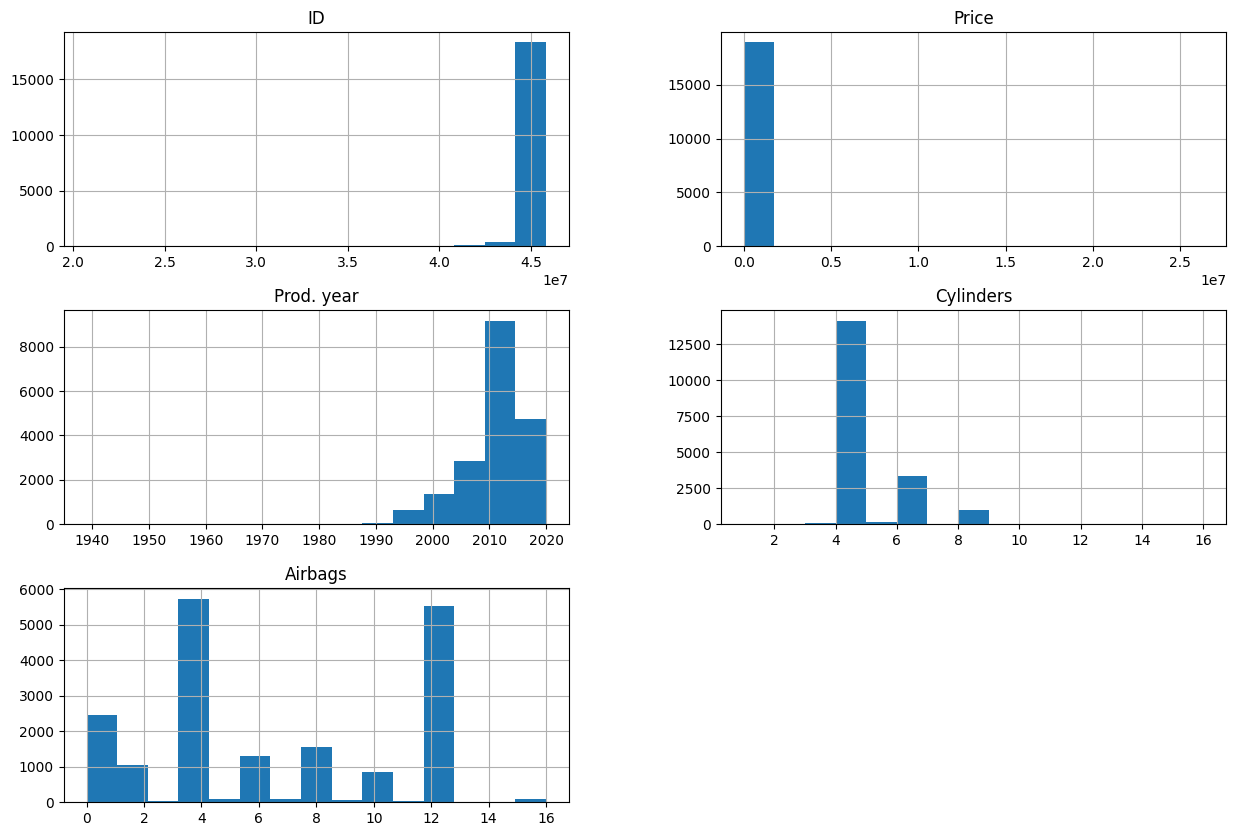

In [113]:
df.hist(bins=15,figsize=(15,10))
plt.show()

In [114]:
top_10_cars=df['Manufacturer'].value_counts().sort_values(ascending=False).head(10)
top_10_cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

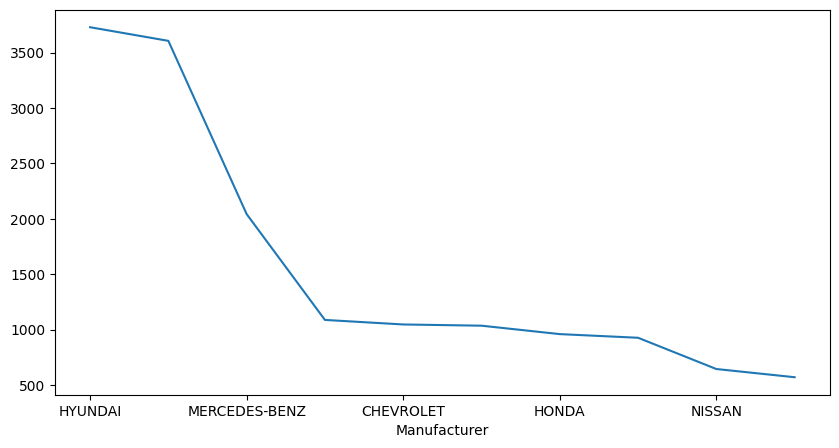

In [115]:
top_10_cars.plot(figsize=(10,5))
plt.show()

In [116]:
top10_mean_pric = df.groupby('Manufacturer')['Price'].mean()
top10_mean_pric=top10_mean_pric.loc[top_10_cars.index].sort_values(ascending=False)
top10_mean_pric


Manufacturer
HYUNDAI          22306.000805
BMW              20609.468147
LEXUS            20052.594391
MERCEDES-BENZ    18590.331375
FORD             15411.850184
CHEVROLET        14894.873926
TOYOTA           14302.447865
HONDA            14162.073958
VOLKSWAGEN       11471.774081
NISSAN            9835.840310
Name: Price, dtype: float64

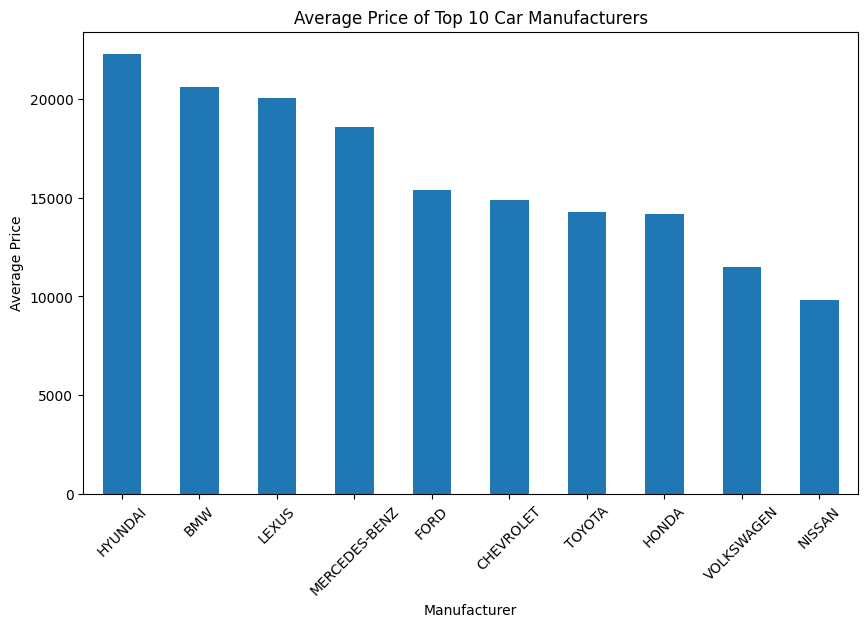

In [117]:
plt.figure(figsize=(10,6))
top10_mean_pric.plot(kind='bar')
plt.title('Average Price of Top 10 Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [118]:
corr=df.corr(numeric_only=True)
corr

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


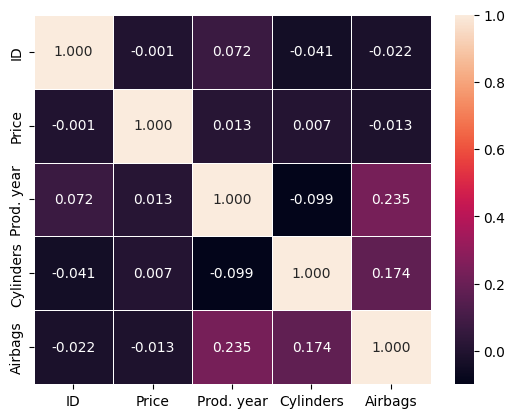

In [119]:
sns.heatmap(corr,annot=True,linewidths=0.5,fmt='.3f')
plt.show()

In [120]:
df_object=df.select_dtypes(include='object')

In [121]:
df_object.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


In [122]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              18924 non-null  object
 1   Manufacturer      18924 non-null  object
 2   Model             18924 non-null  object
 3   Category          18924 non-null  object
 4   Leather interior  18924 non-null  object
 5   Fuel type         18924 non-null  object
 6   Engine volume     18924 non-null  object
 7   Mileage           18924 non-null  object
 8   Gear box type     18924 non-null  object
 9   Drive wheels      18924 non-null  object
 10  Doors             18924 non-null  object
 11  Wheel             18924 non-null  object
 12  Color             18924 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


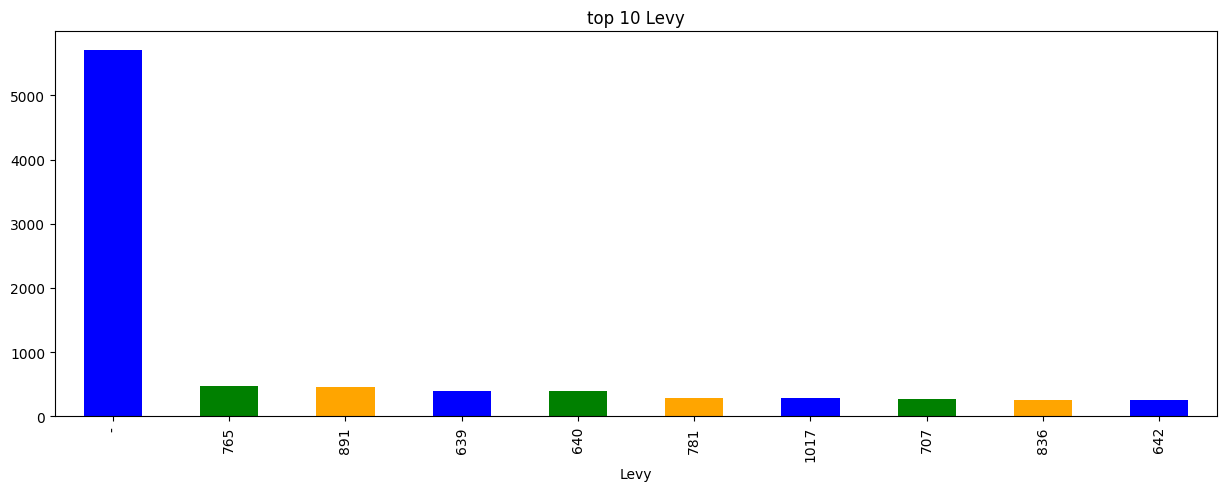

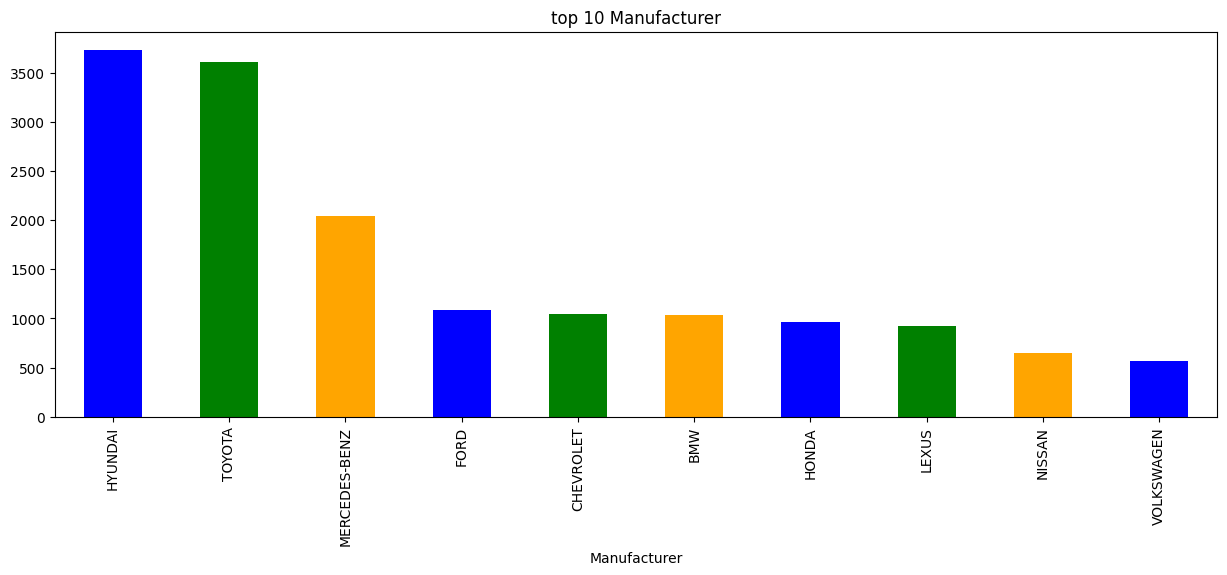

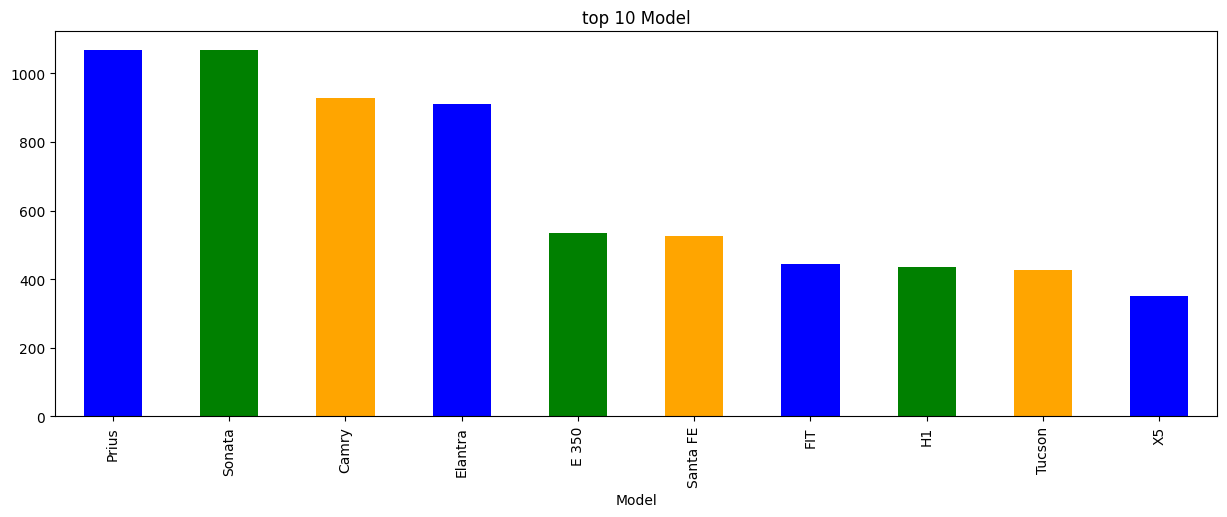

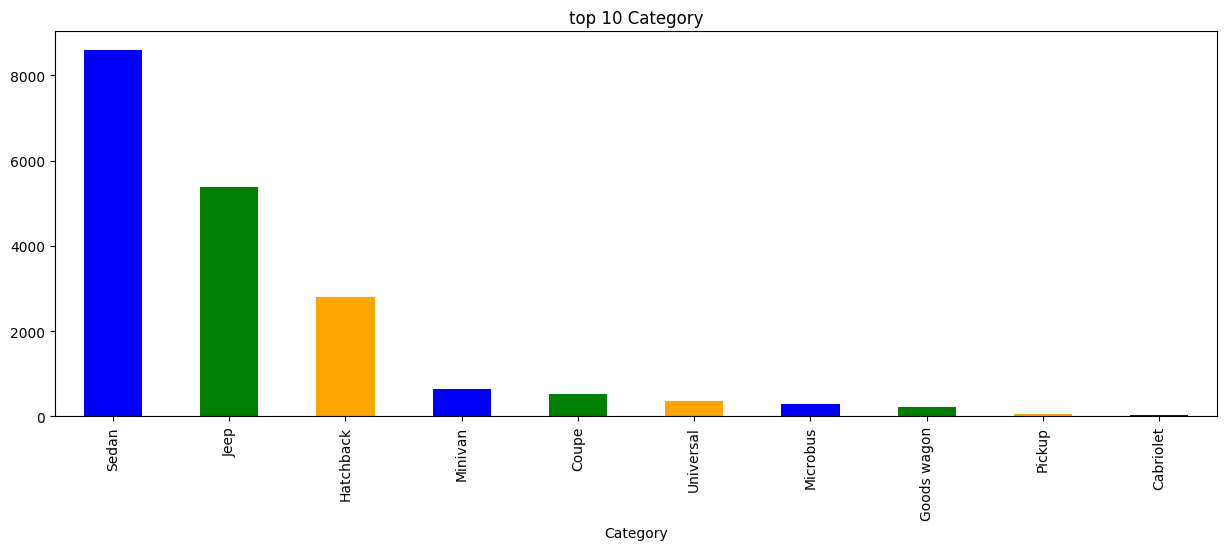

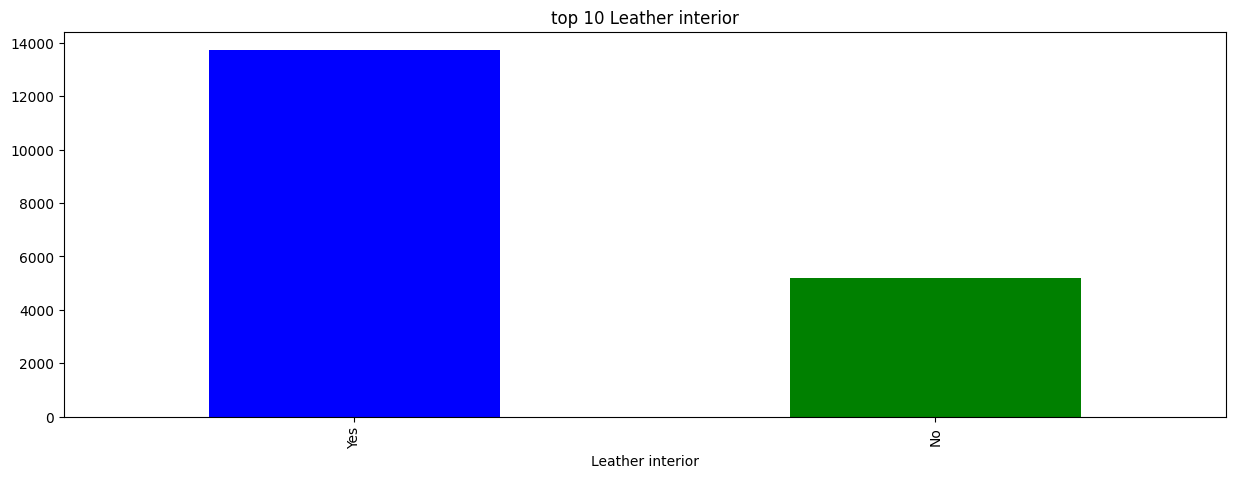

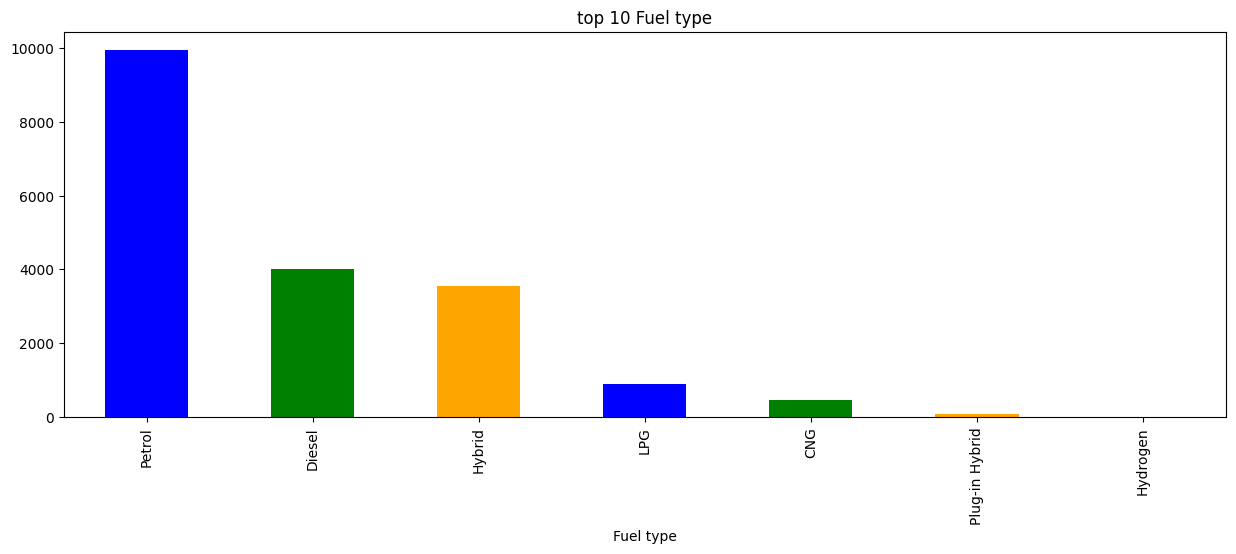

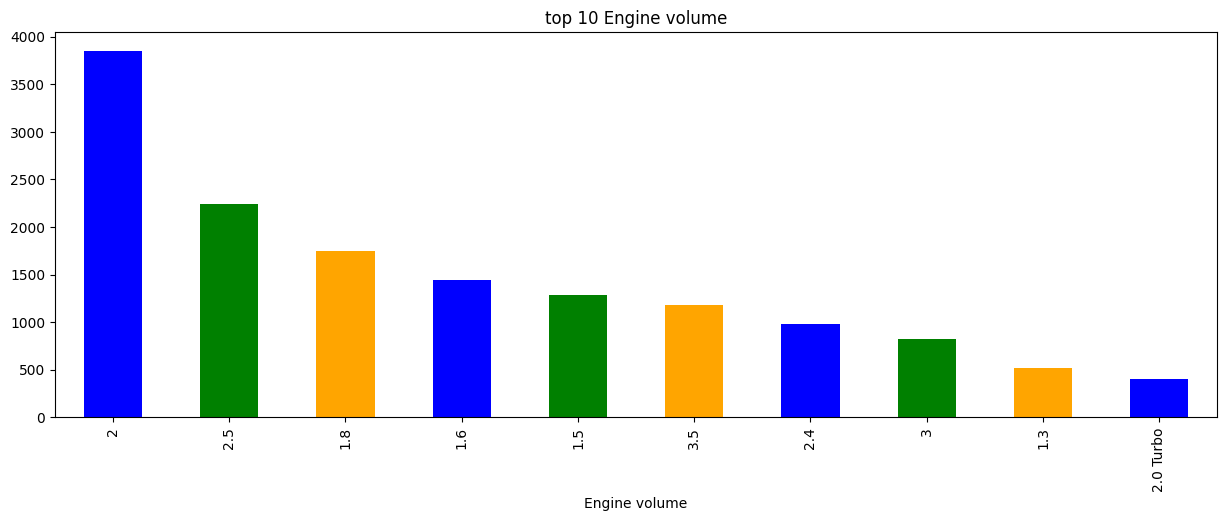

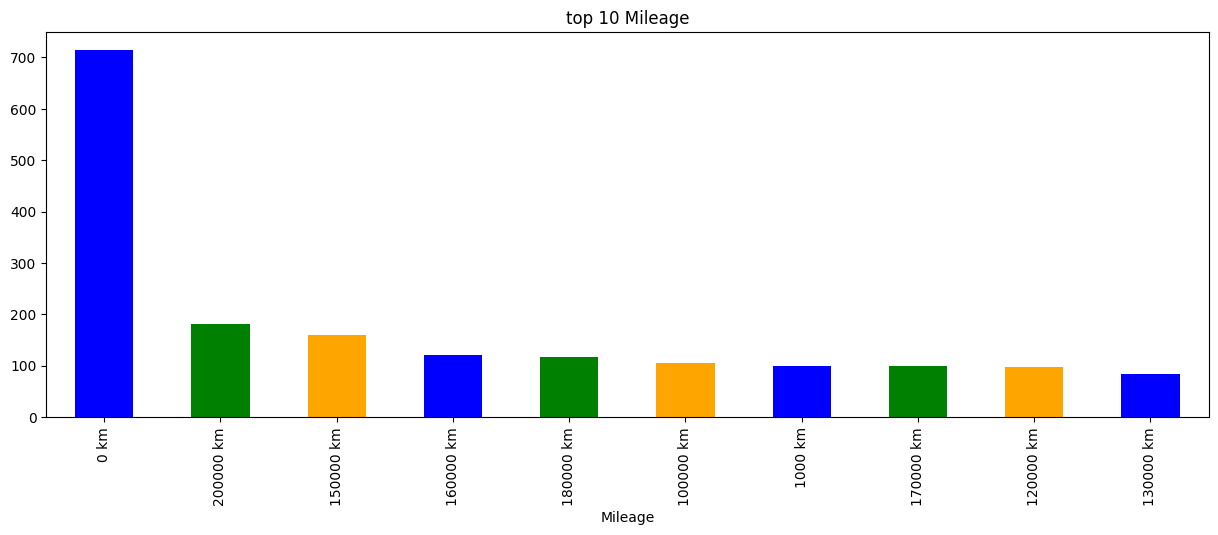

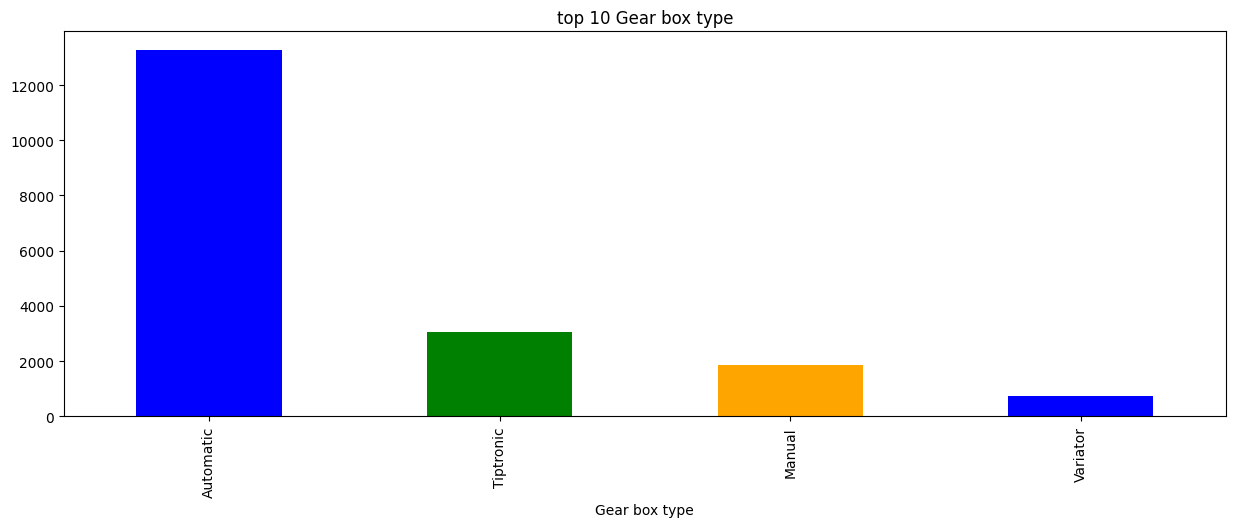

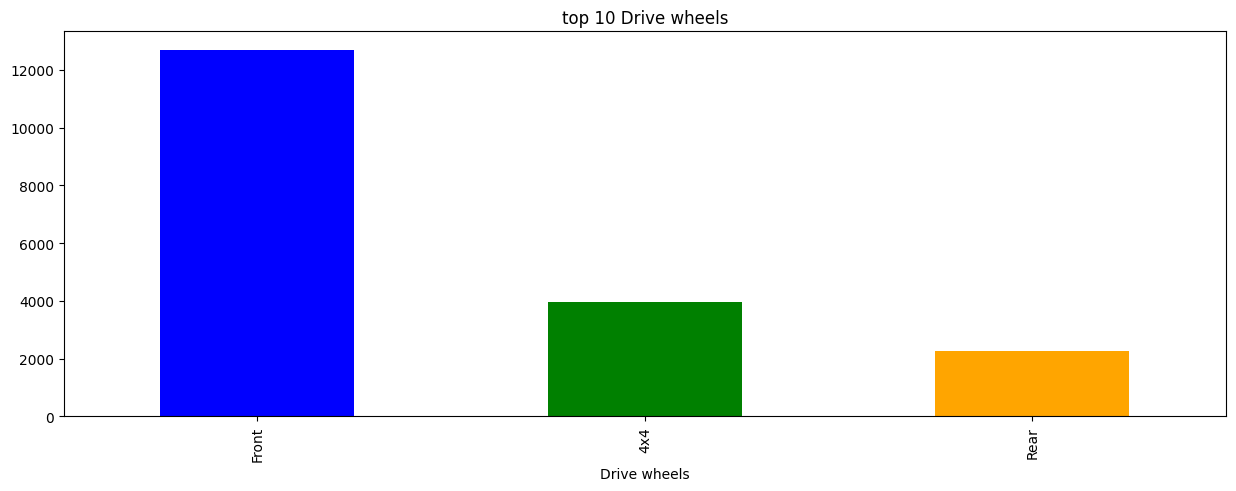

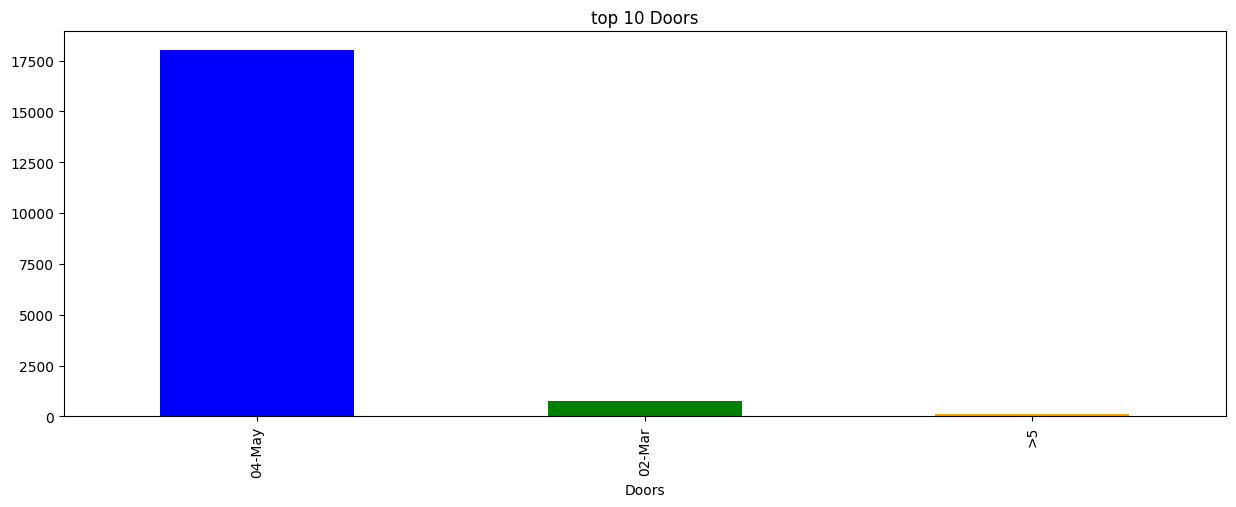

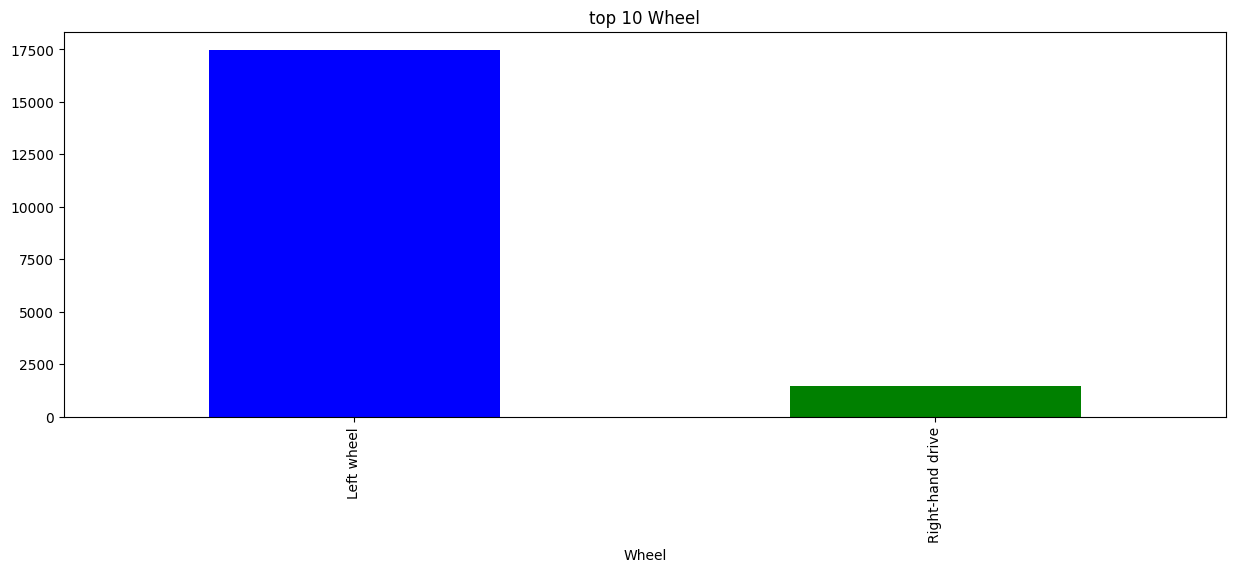

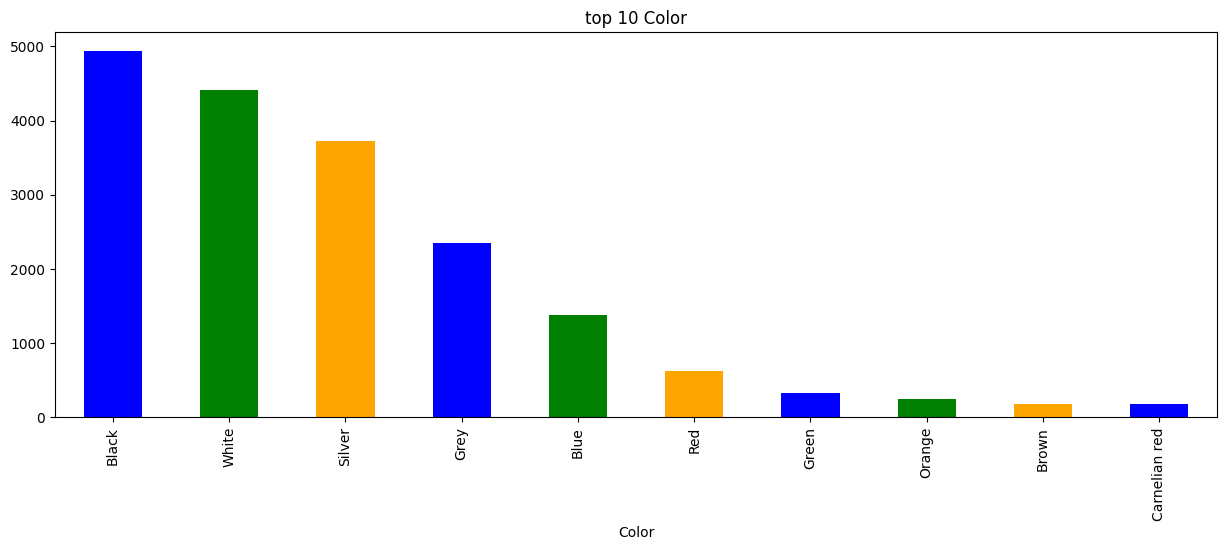

In [123]:
for col in df_object:
    plt.figure(figsize=(15,5))
    top_10=df[col].value_counts().head(10)
    colors=['blue','green','orange']
    top_10.plot(kind='bar',color=colors)
    plt.title('top 10' +" "+ col)
    plt.show()

## Data Processing

In [124]:
df=df.drop(['ID','Doors'],axis=1)

In [125]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2


### Date

In [126]:
import datetime
dtime=datetime.datetime.now()

In [127]:
df['Age']=dtime.year-df['Prod. year']

In [128]:
df=df.drop(['Prod. year'],axis=1)

### Levy

In [129]:
df['Levy'].replace({'-':'0'},inplace=True)
df['Levy']=df['Levy'].astype(int)

### Milage

In [130]:
df['Mileage']=df['Mileage'].str.replace('km','')

### Engine volume

In [131]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [132]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo','')
df['Engine volume']=df['Engine volume'].astype(float)


In [133]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory us

### Detect Outlier

In [135]:
df_numric=df.select_dtypes(exclude='object')
for col in df_numric:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr    
    high=q3+1.5*iqr
    outlier=((df_numric[col]>high) | (df_numric[col]<low)).sum()
    total=df_numric[col].shape[0]
    print(f"Total Outlier in {col} are: {outlier} - {round(100 * outlier / total, 2)}%")
    if outlier > 0 :
        df=df.loc[  (df[col]<=high) & (df[col]>=low)  ] 

Total Outlier in Price are: 1055 - 5.57%
Total Outlier in Levy are: 172 - 0.91%
Total Outlier in Engine volume are: 1358 - 7.18%
Total Outlier in Cylinders are: 4765 - 25.18%
Total Outlier in Airbags are: 0 - 0.0%
Total Outlier in Age are: 1777 - 9.39%


## Transform Data

In [136]:
df_object=df.select_dtypes(include='object')
df_numeric=df.select_dtypes(exclude='object')

In [137]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [138]:
for col in df_object.columns:
    df_object[col] = la.fit_transform(df_object[col].astype(str)).astype(int)

In [139]:
df=pd.concat([df_object,df_numeric],axis=1)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  int64  
 1   Model             12240 non-null  int64  
 2   Category          12240 non-null  int64  
 3   Leather interior  12240 non-null  int64  
 4   Fuel type         12240 non-null  int64  
 5   Mileage           12240 non-null  int64  
 6   Gear box type     12240 non-null  int64  
 7   Drive wheels      12240 non-null  int64  
 8   Wheel             12240 non-null  int64  
 9   Color             12240 non-null  int64  
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  int64  
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.6 MB

## Model

In [141]:
x = df.drop('Price', axis=1)
y = df['Price']


In [142]:
noise = x.copy()
noise["Mileage"] = noise["Mileage"] * (1 + np.random.normal(0, 0.01, size=len(noise)))
noise["Engine volume"] = noise["Engine volume"] * (1 + np.random.normal(0, 0.01, size=len(noise)))

x_aug = pd.concat([x, noise], axis=0).reset_index(drop=True)
y_aug = pd.concat([y, y], axis=0).reset_index(drop=True)

print("Shapes:", x_aug.shape, y_aug.shape)

Shapes: (24480, 15) (24480,)


In [143]:

x_train, x_test, y_train, y_test = train_test_split(x_aug, y_aug, test_size=0.2, random_state=42)

In [144]:
Algorithm = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor',
             'GradientBoostingRegressor', 'XGBRegressor', 'SVR']
R2=[]
RMSE=[]

In [145]:
def models(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test, pre)
    rmse = np.sqrt(mean_squared_error(y_test, pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test, y_test)
    print(f"The Score of Model is: {score}")
    


In [146]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = XGBRegressor()  
model6 = SVR()

In [147]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)

The Score of Model is: 0.21921889486210833
The Score of Model is: 0.8676471740789091
The Score of Model is: 0.910759023498946
The Score of Model is: 0.6730566493259644
The Score of Model is: 0.8541557788848877
The Score of Model is: -0.0037878117161438407


In [153]:
dff=pd.DataFrame({'Algorithm':Algorithm , 'R2_Score':R2,'RMSE':RMSE})
dff

,Algorithm,R2_Score,RMSE
0,LinearRegression,0.219219,9874.806674
1,DecisionTreeRegressor,0.867647,4065.655383
2,RandomForestRegressor,0.910759,3338.459495
3,GradientBoostingRegressor,0.673057,6389.990449
4,XGBRegressor,0.854156,4267.843718
5,SVR,-0.003788,11196.567780


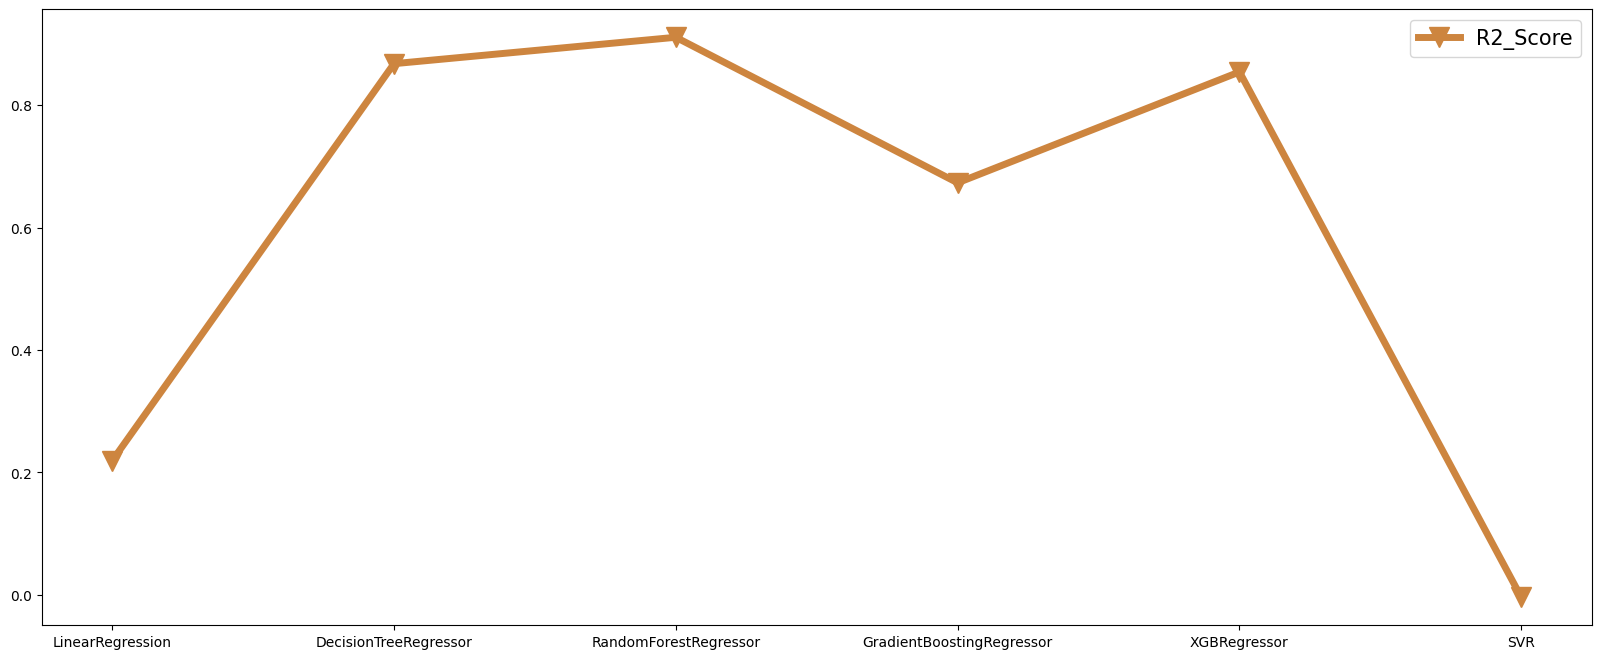

In [154]:
fig = plt.figure(figsize=(20,8))
plt.plot(dff['Algorithm'], dff['R2_Score'], 
         label='R2_Score', lw=5, color='peru', 
         marker='v', markersize=15)
plt.legend(fontsize=15)
plt.show()


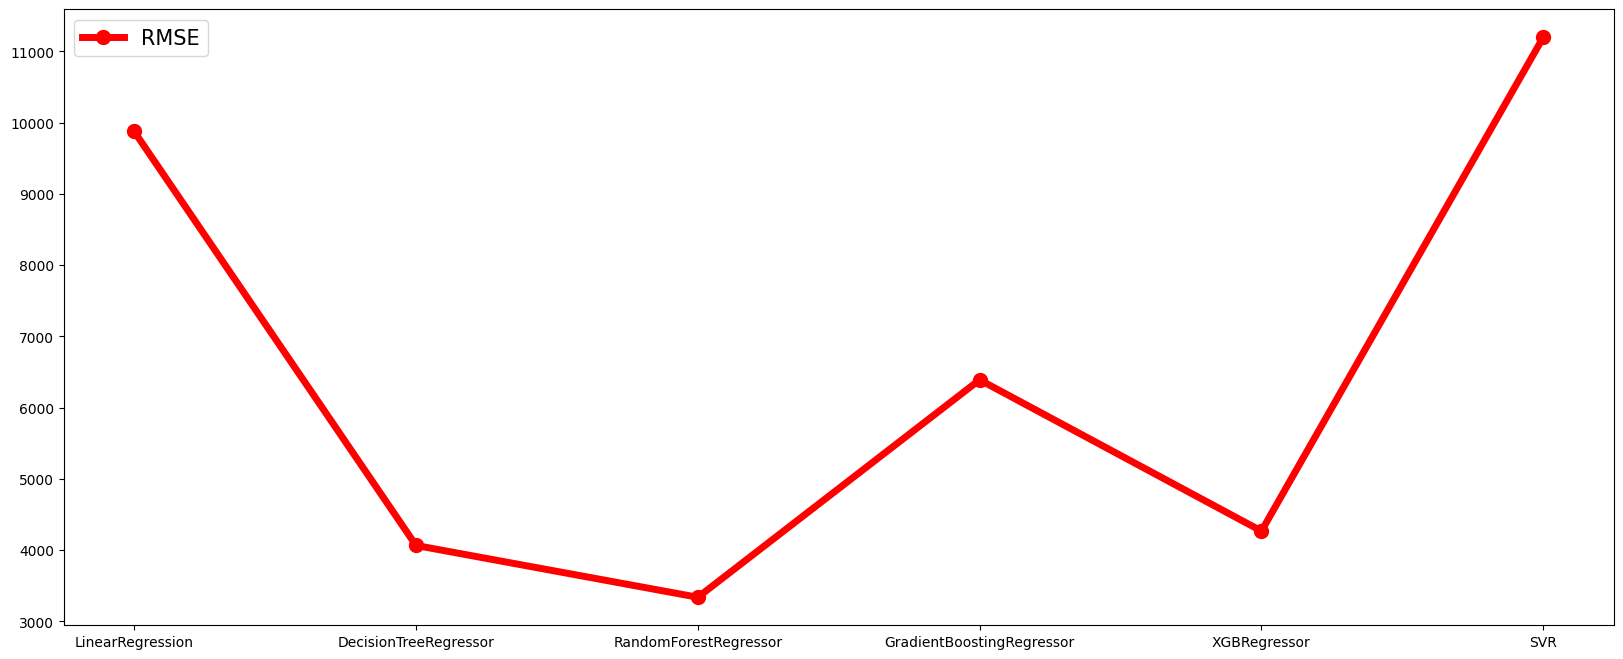

In [155]:
fig = plt.figure(figsize=(20,8))
plt.plot(dff.Algorithm,dff.RMSE ,label='RMSE',lw=5,color='r',marker='o',markersize = 10)
plt.legend(fontsize=15)
plt.show()

In [156]:
import pickle
file_name='car_price_prediction.csv'
pickle.dump(model3,open(file_name,'wb'))